# Using Support Vector Machine with Countvectorizer and TFIDF with unigram and bigram.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("../input_data/clean_tweet_without_NaN.csv")

In [3]:
x = df.text
y = df.target

In [4]:
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [5]:
print "Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 4]) / (len(x_train)*1.))*100)
print "Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 4]) / (len(x_validation)*1.))*100)
print "Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 4]) / (len(x_test)*1.))*100)

Train set has total 1562575 entries with 50.02% negative, 49.98% positive
Validation set has total 15945 entries with 50.66% negative, 49.34% positive
Test set has total 15945 entries with 49.70% negative, 50.30% positive


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from time import time
import numpy as np

In [10]:
def accuracy_summary(pipeline, x_train, y_train, x_validation, y_validation, x_test, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred_val = sentiment_fit.predict(x_validation)
    y_pred_test = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    val_accuracy = accuracy_score(y_validation, y_pred_val)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print "val accuracy score: {0:.2f}%".format(val_accuracy*100)
    print "test accuracy score: {0:.2f}%".format(test_accuracy*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return val_accuracy, test_accuracy, train_test_time, sentiment_fit

In [15]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
svm_obj = LinearSVC(C=0.1)

n_features = np.arange(10000,100001,10000)
n_feature_only_one = np.arange(100000,100001)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=None):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_val_accuracy,nfeature_test_accuracy,tt_time,model = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation, x_test, y_test)
        result.append((n,nfeature_val_accuracy,nfeature_test_accuracy,tt_time))
    return result,model

In [63]:
def plot_tfidf(x,y1,y2,y3,y4,label1,label2,label3,label4):
    plt.figure(figsize=(12,8))
    plt.plot(x, y1, label=label1)
    plt.plot(x, y2, label=label2)
    plt.plot(x, y3, label=label3)
    plt.plot(x, y4, label=label4)
    plt.legend(loc='best')
    plt.xlabel('number of features')
    plt.ylabel('accuracy')
    plt.title('Accuracy using tf-idf model')
    plt.show()

def plot_bow(y1,y2,y3,y4,label1,label2,label3,label4):
    plt.figure(figsize=(12,8))
    index = np.arange(4)
    l = [y1,y2,y3,y4]
    labels = [label1,label2,label3,label4]
    plt.bar(labels, l)
    plt.xlabel('model')
    plt.ylabel('accuracy')
    plt.xticks(index, label=labels, rotation=30)
    plt.title('Accuracy using bag of words model')
    plt.show()

### 1. Using countvectorizer, unigram, stop words removed

In [16]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS REMOVED (CountVectorizer)\n"
svm_uni_cvec_wo_stpw,svm_unigram_cvec = nfeature_accuracy_checker(n_features=n_feature_only_one,vectorizer=cvec,classifier=svm_obj)

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 100000 features
val accuracy score: 78.78%
test accuracy score: 78.51%
train and test time: 423.72s
--------------------------------------------------------------------------------
CPU times: user 7min 4s, sys: 320 ms, total: 7min 4s
Wall time: 7min 4s


In [27]:
with open("cvec_uni_removed.pkl",'w') as f:
    pickle.dump(svm_unigram_cvec,f)

### 2. Using countvectorizer, bigram, stop words removed

In [17]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS REMOVED (CountVectorizer)\n"
svm_bi_cvec_wo_stpw,svm_bigram_cvec = nfeature_accuracy_checker(n_features=n_feature_only_one,vectorizer=cvec,ngram_range=(1, 2),classifier=svm_obj)

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 100000 features
val accuracy score: 80.80%
test accuracy score: 80.81%
train and test time: 662.36s
--------------------------------------------------------------------------------
CPU times: user 11min 1s, sys: 1.5 s, total: 11min 2s
Wall time: 11min 2s


In [28]:
with open('cvec_bi_removed.pkl','w') as f:
    pickle.dump(svm_bigram_cvec,f)

### 3. Using tf-idf, unigram, stop words removed

In [18]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS REMOVED (Tfidf)\n"
svm_uni_tvec_wo_stpw,svm_unigram_tfidf = nfeature_accuracy_checker(vectorizer=tvec,classifier=svm_obj)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 10000 features
val accuracy score: 78.56%
test accuracy score: 78.67%
train and test time: 31.15s
--------------------------------------------------------------------------------
Validation result for 20000 features
val accuracy score: 78.83%
test accuracy score: 78.84%
train and test time: 33.44s
--------------------------------------------------------------------------------
Validation result for 30000 features
val accuracy score: 78.80%
test accuracy score: 78.88%
train and test time: 28.64s
--------------------------------------------------------------------------------
Validation result for 40000 features
val accuracy score: 78.83%
test accuracy score: 78.90%
train and test time: 29.31s
----------------

In [29]:
with open('tvec_uni_removed.pkl','w') as f:
    pickle.dump(svm_unigram_tfidf,f)

### 4. Using tf-idf, bigram, stop words removed

In [19]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS REMOVED (Tfidf)\n"
svm_bi_tvec_wo_stpw,svm_bigram_tvec = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2),classifier=svm_obj)

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 10000 features
val accuracy score: 79.99%
test accuracy score: 80.01%
train and test time: 73.91s
--------------------------------------------------------------------------------
Validation result for 20000 features
val accuracy score: 80.60%
test accuracy score: 80.61%
train and test time: 76.55s
--------------------------------------------------------------------------------
Validation result for 30000 features
val accuracy score: 80.77%
test accuracy score: 80.67%
train and test time: 80.80s
--------------------------------------------------------------------------------
Validation result for 40000 features
val accuracy score: 81.14%
test accuracy score: 81.00%
train and test time: 76.82s
-----------------

In [30]:
with open('tvec_bi_removed.pkl','w') as f:
    pickle.dump(svm_bigram_tvec,f)

In [22]:
import pickle
with open('first_4.pkl','w') as f:
    pickle.dump(svm_uni_cvec_wo_stpw,f)
    pickle.dump(svm_bi_cvec_wo_stpw,f)
    pickle.dump(svm_uni_tvec_wo_stpw,f)
    pickle.dump(svm_bi_tvec_wo_stpw,f)
    

### 5. Using countvectorizer, unigram, stop words not removed

In [23]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS NOT REMOVED (CountVectorizer)\n"
svm_uni_cvec_w_stpw,svm_unigram_cvec_stp = nfeature_accuracy_checker(n_features=n_feature_only_one,vectorizer=cvec,classifier=svm_obj,stop_words='english')

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 100000 features
val accuracy score: 76.81%
test accuracy score: 76.33%
train and test time: 374.66s
--------------------------------------------------------------------------------
CPU times: user 6min 14s, sys: 588 ms, total: 6min 14s
Wall time: 6min 14s


In [31]:
with open('cvec_uni_not_removed.pkl','w') as f:
    pickle.dump(svm_unigram_cvec_stp,f)

### 6. Using countvectorizer, bigram, stop words not removed

In [24]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS NOT REMOVED (CountVectorizer)\n"
svm_bi_cvec_w_stpw,svm_bigram_cvec_stp = nfeature_accuracy_checker(n_features=n_feature_only_one,vectorizer=cvec,ngram_range=(1, 2),classifier=svm_obj,stop_words='english')

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 100000 features
val accuracy score: 77.59%
test accuracy score: 77.32%
train and test time: 666.90s
--------------------------------------------------------------------------------
CPU times: user 11min 5s, sys: 1.4 s, total: 11min 6s
Wall time: 11min 6s


In [32]:
with open('cvec_bi_not_removed.pkl','w') as f:
    pickle.dump(svm_bigram_cvec_stp,f)

### 7. Using tf-idf, unigram, stop words not removed

In [25]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS NOT REMOVED (Tfidf)\n"
svm_uni_tvec_w_stpw,svm_unigram_tfidf_stp = nfeature_accuracy_checker(vectorizer=tvec,classifier=svm_obj,stop_words='english')

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 10000 features
val accuracy score: 76.56%
test accuracy score: 76.25%
train and test time: 30.33s
--------------------------------------------------------------------------------
Validation result for 20000 features
val accuracy score: 76.81%
test accuracy score: 76.32%
train and test time: 29.27s
--------------------------------------------------------------------------------
Validation result for 30000 features
val accuracy score: 76.87%
test accuracy score: 76.41%
train and test time: 27.74s
--------------------------------------------------------------------------------
Validation result for 40000 features
val accuracy score: 76.91%
test accuracy score: 76.40%
train and test time: 29.66s
----------------

In [33]:
with open('tvec_uni_not_removed.pkl','w') as f:
    pickle.dump(svm_unigram_tfidf_stp,f)

### 8. Using tf-idf, bigram, stop words not removed

In [26]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS NOT REMOVED (Tfidf)\n"
svm_bi_tvec_w_stpw,svm_bigram_tvec_stp = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2),classifier=svm_obj,stop_words='english')

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


Validation result for 10000 features
val accuracy score: 77.19%
test accuracy score: 76.69%
train and test time: 71.84s
--------------------------------------------------------------------------------
Validation result for 20000 features
val accuracy score: 77.59%
test accuracy score: 77.01%
train and test time: 75.44s
--------------------------------------------------------------------------------
Validation result for 30000 features
val accuracy score: 77.85%
test accuracy score: 77.44%
train and test time: 74.12s
--------------------------------------------------------------------------------
Validation result for 40000 features
val accuracy score: 78.05%
test accuracy score: 77.50%
train and test time: 73.96s
-----------------

In [34]:
with open('tvec_bi_not_removed.pkl','w') as f:
    pickle.dump(svm_bigram_tvec_stp,f)

#### Data Plots

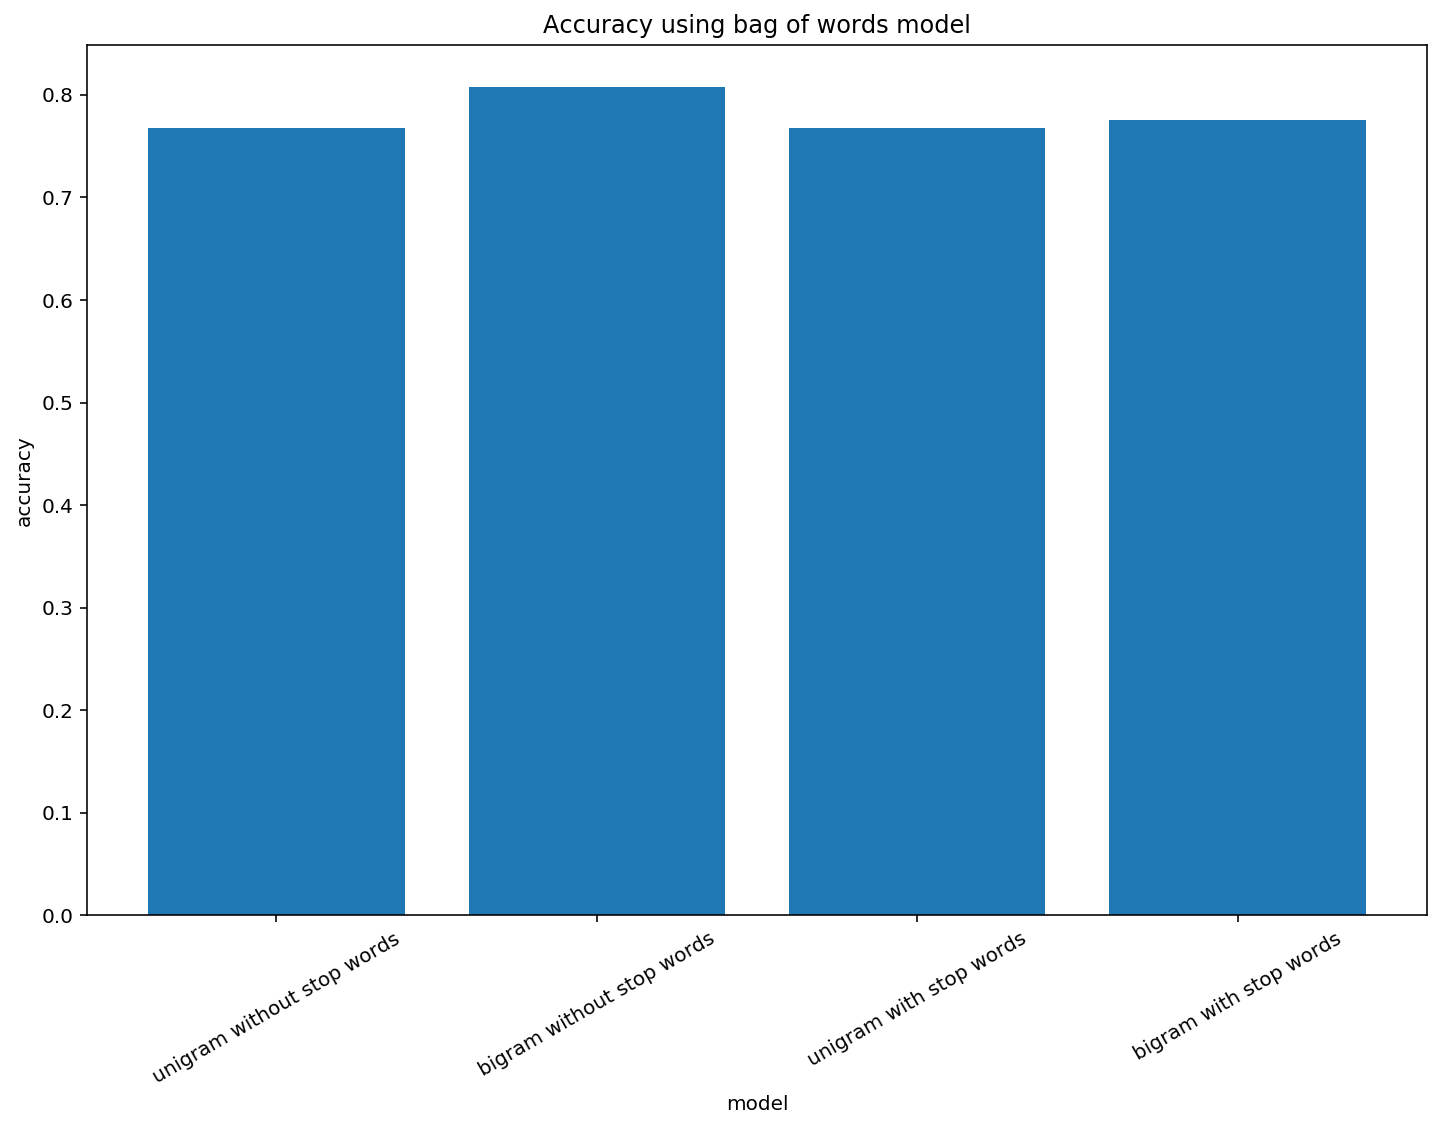

In [64]:
x_axis, val_acc_uni_cvec_wo, test_acc_uni_cvec_wo, _   = svm_uni_cvec_wo_stpw[0]
x_axis, val_acc_bi_cvec_wo, test_acc_bi_cvec_wo, _     = svm_bi_cvec_wo_stpw[0]
x_axis, val_acc_uni_cvec_w, test_acc_uni_cvec_w, _     = svm_uni_cvec_w_stpw[0]
x_axis, val_acc_bi_cvec_w, test_acc_bi_cvec_w, _       = svm_bi_cvec_w_stpw[0]

plot_bow(val_acc_uni_cvec_wo,
           val_acc_bi_cvec_wo,
           val_acc_uni_cvec_w,
           val_acc_bi_cvec_w,
           "unigram without stop words",
           "bigram without stop words",
           "unigram with stop words",
           "bigram with stop words")

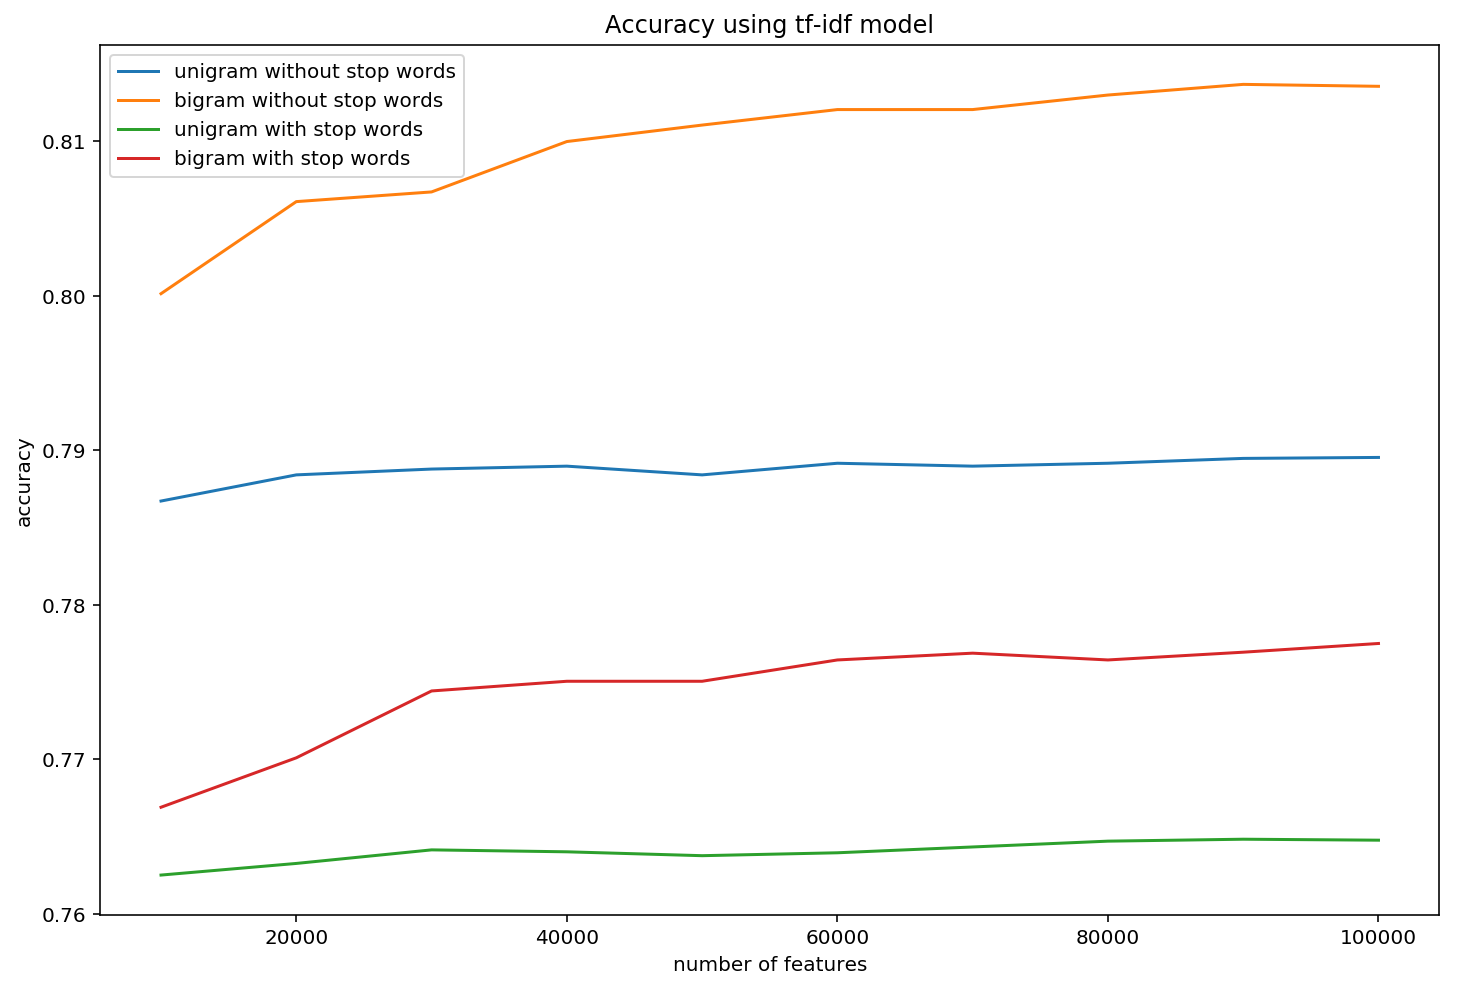

In [65]:
x_axis, val_acc_uni_tvec_wo, test_acc_uni_tvec_wo = list(), list(), list()
for t in svm_uni_tvec_wo_stpw:
    x_axis.append(t[0])
    val_acc_uni_tvec_wo.append(t[1])
    test_acc_uni_tvec_wo.append(t[2])
# x_axis, val_acc_uni_tvec_wo, test_acc_uni_tvec_wo, _   = svm_uni_tvec_wo_stpw

x_axis, val_acc_bi_tvec_wo, test_acc_bi_tvec_wo = list(), list(), list()
for t in svm_bi_tvec_wo_stpw:
    x_axis.append(t[0])
    val_acc_bi_tvec_wo.append(t[1])
    test_acc_bi_tvec_wo.append(t[2])
# x_axis, val_acc_bi_tvec_wo, test_acc_bi_tvec_wo, _     = svm_bi_tvec_wo_stpw

x_axis, val_acc_uni_tvec_w, test_acc_uni_tvec_w = list(), list(), list()
for t in svm_uni_tvec_w_stpw:
    x_axis.append(t[0])
    val_acc_uni_tvec_w.append(t[1])
    test_acc_uni_tvec_w.append(t[2])
# x_axis, val_acc_uni_tvec_w, test_acc_uni_tvec_w, _     = svm_uni_tvec_w_stpw

x_axis, val_acc_bi_tvec_w, test_acc_bi_tvec_w = list(), list(), list()
for t in svm_bi_tvec_w_stpw:
    x_axis.append(t[0])
    val_acc_bi_tvec_w.append(t[1])
    test_acc_bi_tvec_w.append(t[2])
# x_axis, val_acc_bi_tvec_w, test_acc_bi_tvec, _         = svm_bi_tvec_w_stpw

plot_tfidf(x_axis,
           test_acc_uni_tvec_wo,
           test_acc_bi_tvec_wo,
           test_acc_uni_tvec_w,
           test_acc_bi_tvec_w,
           "unigram without stop words",
           "bigram without stop words",
           "unigram with stop words",
           "bigram with stop words")

In [66]:
print svm_bi_cvec_wo_stpw

[(100000, 0.8079648792724993, 0.8080903104421449, 662.3598308563232)]


In [67]:
print svm_bi_tvec_wo_stpw

[(10000, 0.7998745688303543, 0.8001254311696456, 73.90651416778564), (20000, 0.8060206961429915, 0.8060834117278144, 76.55018401145935), (30000, 0.8077140169332079, 0.8067105675760426, 80.79872798919678), (40000, 0.8113515208529319, 0.8099717779868297, 76.81808805465698), (50000, 0.8134838507369081, 0.8110379429288178, 77.45153999328613), (60000, 0.8149263091878332, 0.812041392285983, 76.43015193939209), (70000, 0.8151771715271245, 0.812041392285983, 81.3494439125061), (80000, 0.8151144559423017, 0.8129821260583255, 76.48842406272888), (90000, 0.8149263091878332, 0.8136719974913766, 75.21609091758728), (100000, 0.8148008780181876, 0.813546566321731, 74.76329207420349)]


#### Testing on FB and amazon reviews

In [74]:
fb = pd.read_csv("../input_data/facebook_comments/clean_fb.csv")
am = pd.read_csv("../input_data/amazon_review/clean_amazon.csv")

fb.dropna(inplace=True)
fb.reset_index(drop=True,inplace=True)

am.dropna(inplace=True)
am.reset_index(drop=True,inplace=True)


In [69]:
y_pred = svm_bigram_tvec.predict(fb.text)
acc = accuracy_score(y_pred,fb.target)
print acc

0.8400556328233658


In [70]:
y_pred = svm_bigram_tvec.predict(am.text)
acc = accuracy_score(y_pred,am.target)
print acc

0.7751937984496124
